In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset

df=pd.read_csv('SeoulBikeData.csv')

In [3]:
#First 5 rows

df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# last 5 rows

df.tail()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
# 
df.describe()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
#Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
#Shape of dataset
df.shape

(8760, 14)

In [8]:
#Checking for null values

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [107]:
df.duplicated().sum()

0

In [9]:
df['Date']=df['Date'].astype('datetime64[ns]')

In [10]:
df

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [11]:
df['Month']=df['Date'].dt.month

In [12]:
df['Year']=df['Date'].dt.year

In [13]:
df['Day']=df['Date'].dt.day_name()

In [14]:
df['Weekend']=df['Day'].apply(lambda x:1 if x=='Saturday' or x=='Sunday' else 0)

In [15]:
#df['Weekend'].unique()

In [16]:
df.drop(['Date','Day'],axis=1,inplace=True)


In [17]:
df.rename(columns={'Temperature(�C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Dew point temperature(�C)':'Dew point temperature',
                   'Solar Radiation (MJ/m2)':'Solar Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall'},inplace=True)

In [18]:
df

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,Year,Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,0


In [19]:
#Checking for duplicate value


df.duplicated().sum()

0

<AxesSubplot:>

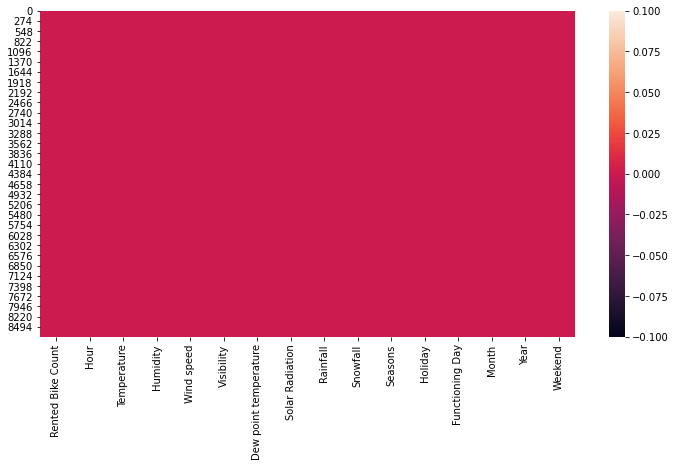

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [49]:
radiation_season=df.groupby('Seasons')

In [53]:
radiation_season.size().sort_values(ascending=False)

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
dtype: int64

In [55]:
radiation_season.last()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,Functioning Day,Month,Year,Weekend
Seasons,,,,,,,,,,,,,,,
Autumn,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,No Holiday,Yes,11,2018,0
Spring,1343,23,20.5,62,2.2,1903,12.9,0.0,0.0,0.0,No Holiday,Yes,5,2018,0
Summer,1329,23,23.8,81,0.6,1893,20.3,0.0,0.0,0.0,No Holiday,Yes,8,2018,0
Winter,23,23,1.8,96,1.2,745,1.2,0.0,0.0,0.0,No Holiday,Yes,2,2018,0


In [59]:
radiation_season.get_group('Autumn')

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,Year,Weekend
6576,1075,0,23.2,83,0.5,1887,20.1,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,2018,0
6577,975,1,22.7,83,0.1,1940,19.6,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,2018,0
6578,785,2,22.0,86,0.4,1703,19.5,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,2018,0
6579,514,3,21.6,87,0.3,1579,19.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,2018,0
6580,338,4,21.2,88,0.9,1183,19.1,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,0


In [63]:
radiation_season2=df['Rented Bike Count'].sum().sort_values(ascending=False)

Seasons
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
Name: Rented Bike Count, dtype: int64

In [87]:
s=df.groupby('Seasons').sum()['Rented Bike Count']

<AxesSubplot:xlabel='Rented Bike Count'>

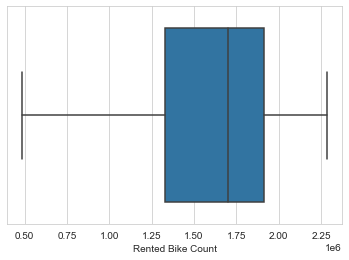

In [90]:
sns.boxplot(s)

<AxesSubplot:>

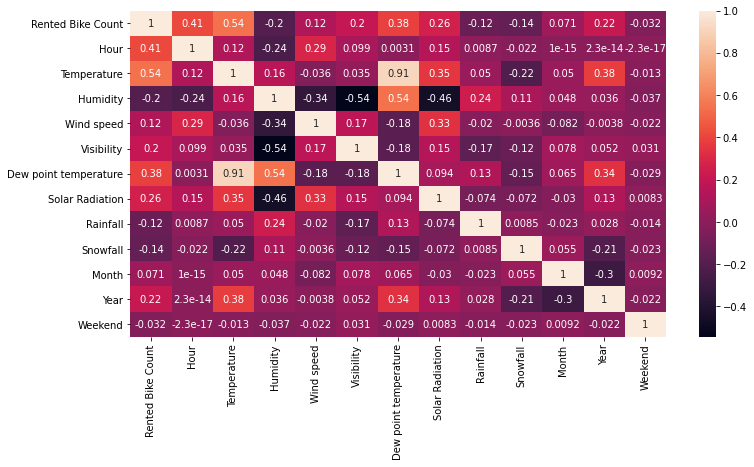

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [22]:
df['Rented Bike Count'].unique()

array([ 254,  204,  173, ..., 1538,  804,  595], dtype=int64)

In [23]:
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

<AxesSubplot:ylabel='Rented Bike Count'>

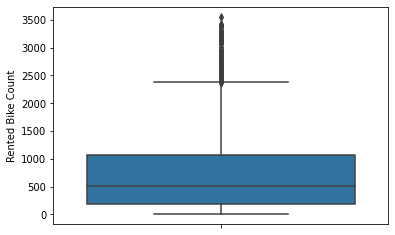

In [24]:
sns.boxplot(y=df['Rented Bike Count'])

<AxesSubplot:ylabel='Hour'>

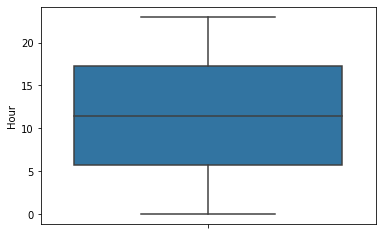

In [25]:
sns.boxplot(y=df['Hour'])

<AxesSubplot:ylabel='Temperature'>

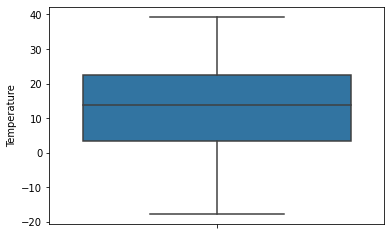

In [26]:
sns.boxplot(y=df['Temperature'])

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

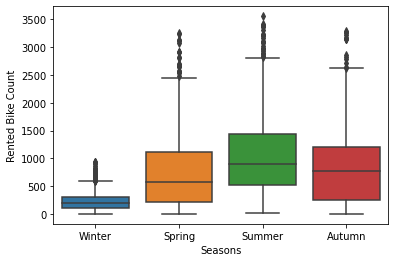

In [27]:
sns.boxplot(x=df['Seasons'],y=df['Rented Bike Count'])

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

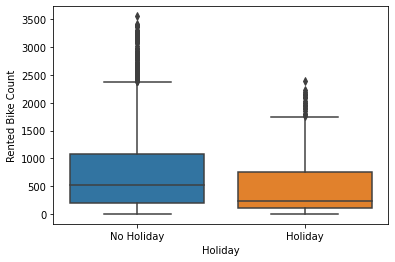

In [28]:
sns.boxplot(x=df['Holiday'],y=df['Rented Bike Count'])

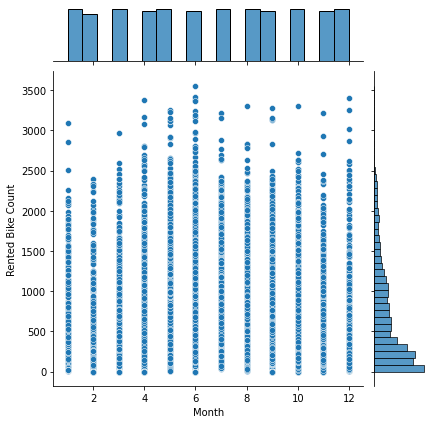

In [29]:
sns.jointplot(x=df['Month'],y=df['Rented Bike Count'])

<AxesSubplot:xlabel='Weekend', ylabel='Rented Bike Count'>

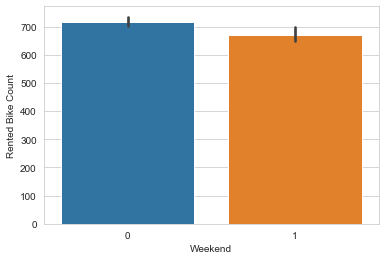

In [30]:
sns.set_style('whitegrid')
sns.barplot(x=df['Weekend'],y=df['Rented Bike Count'])

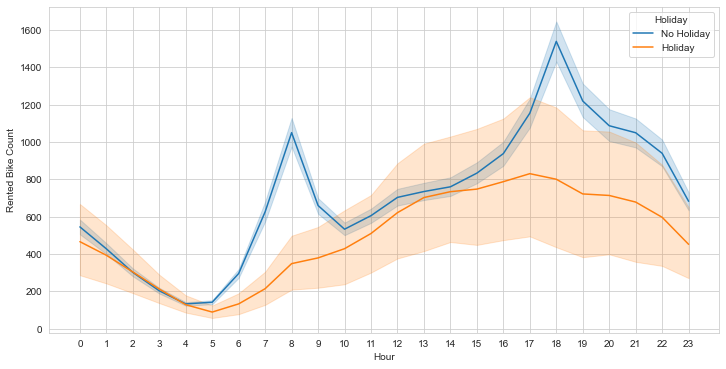

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(y=df['Rented Bike Count'],x=df['Hour'],hue=df['Holiday'])
plt.xticks(np.arange(0,24))
plt.show()

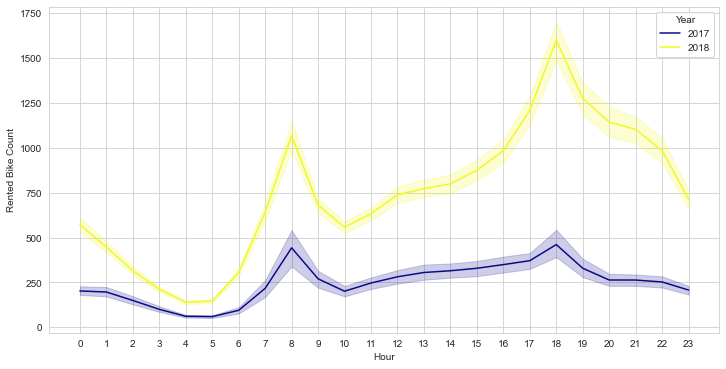

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(y=df['Rented Bike Count'],x=df['Hour'],hue=df['Year'],palette='plasma')
plt.xticks(np.arange(0,24))
plt.show()

<AxesSubplot:xlabel='Year'>

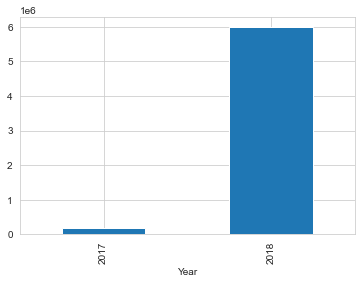

In [104]:
df.groupby('Year').sum()['Rented Bike Count'].plot.bar()

In [33]:
df['Year'].unique()

array([2017, 2018], dtype=int64)

In [38]:
df['Snowfall'].unique()

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.7, 4. , 4.1,
       4.3, 3.9, 3.1, 2.1, 1.4, 0.5, 1.3, 1.8, 2. , 4.8, 5.1, 5. , 4.2,
       3.2, 2.6, 2.5, 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.2, 1.1, 3. , 3.3,
       3.5, 3.4, 2.8, 1.5, 3.8, 3.7, 7.1, 8.8, 7. , 6. , 3.6, 2.9])

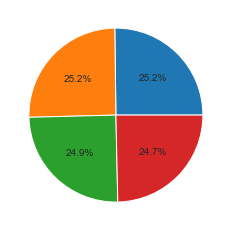

In [34]:
plt.pie(df['Seasons'].value_counts(),autopct='%1.1f%%')
plt.show()

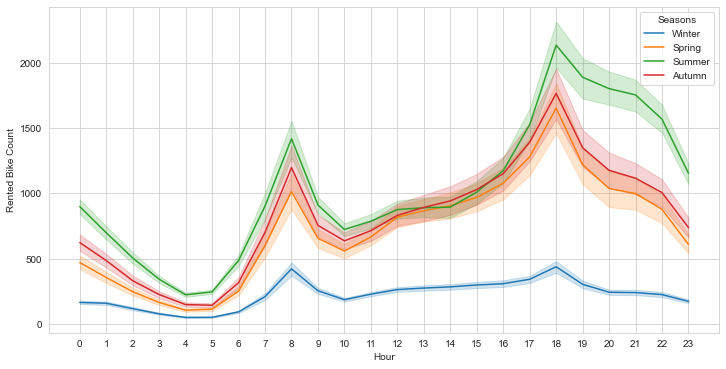

In [35]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Hour'],y=df['Rented Bike Count'],hue=df['Seasons'])
plt.xticks((np.arange(0,24)))
plt.show()

<AxesSubplot:xlabel='Rainfall', ylabel='Rented Bike Count'>

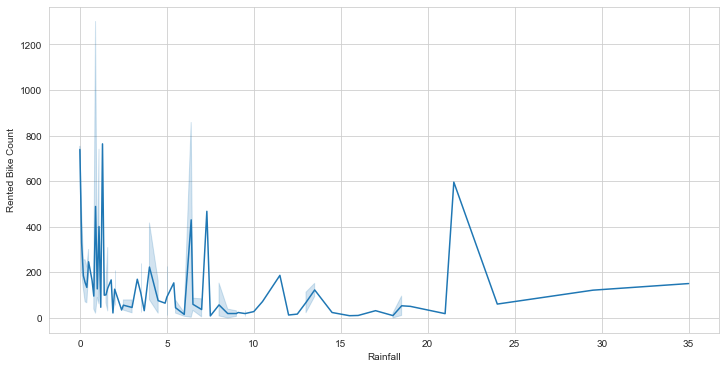

In [36]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Rainfall'],y=df['Rented Bike Count'])

In [37]:
#plt.figure(figsize=(12,6))
#sns.pointplot(x=df['Snowfall'].mean(),y=df['Rented Bike Count'])

<AxesSubplot:xlabel='Seasons'>

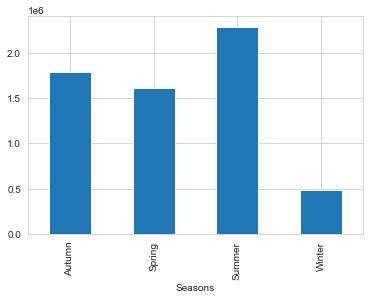

In [101]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.bar()

<AxesSubplot:xlabel='Hour'>

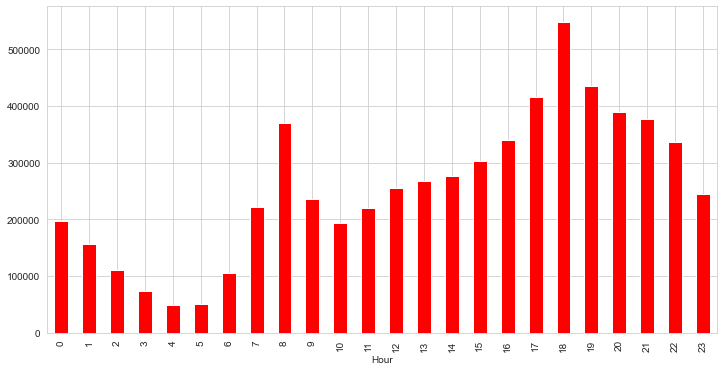

In [83]:
plt.figure(figsize=(12,6))
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar(color='red')



<AxesSubplot:ylabel='Holiday'>

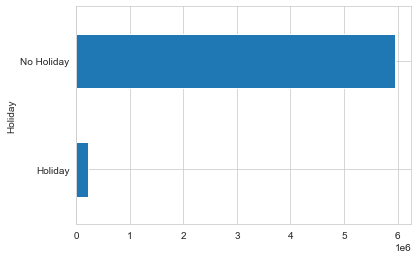

In [86]:
df.groupby('Holiday').sum()['Rented Bike Count'].plot.barh()

<AxesSubplot:xlabel='Rainfall'>

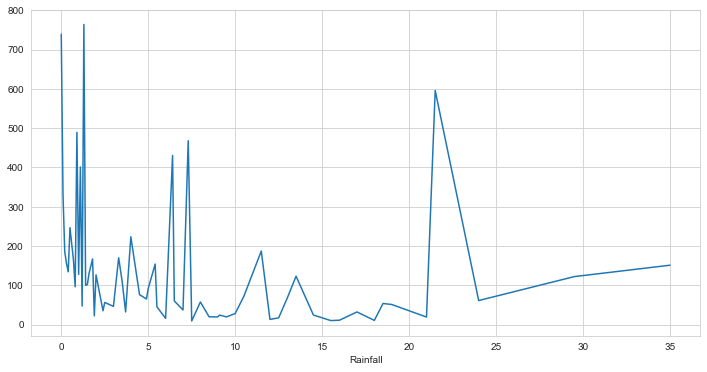

In [95]:
plt.figure(figsize=(12,6))
df.groupby('Rainfall').mean()['Rented Bike Count'].plot()

In [105]:
df.head(1)

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,Year,Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,0


In [123]:
df.drop('Dew point temperature',axis=1,inplace=True)

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
vif=pd.DataFrame()

def calc_val(X):
    vif['Variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return (vif)

In [125]:
calc_val(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,Variables,VIF
0,Hour,4.445856
1,Temperature,3.515985
2,Humidity,23.371753
3,Wind speed,4.837073
4,Visibility,10.394785
5,Solar Radiation,2.751327
6,Rainfall,1.089848
7,Snowfall,1.128318
8,Month,4.720191
9,Year,55.901330


<AxesSubplot:>

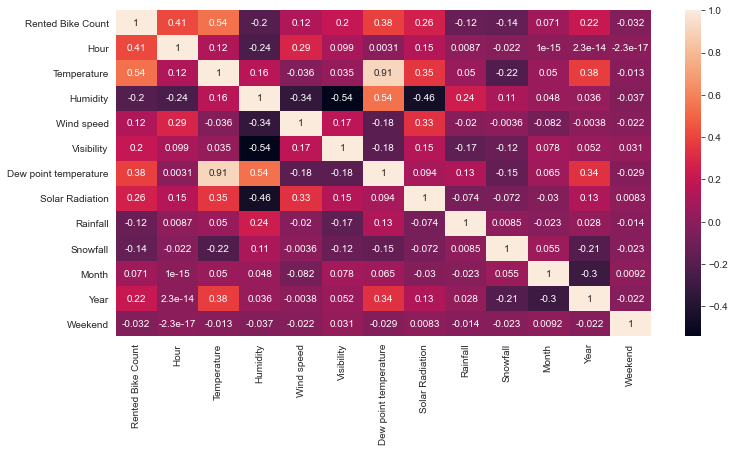

In [121]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)